<center>
<h1 style="color:red; font-size:70px;"> Esercitazione 5</h1>

In [13]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from hyperopt import tpe, hp, fmin, Trials
from hyperopt.pyll.stochastic import sample
from tensorflow.keras import layers, activations

<h1 style="color: blue; font-size:50px;"> Esercizio 1 - Ottimizzazione Bayesana</h1>

L’ottimizzazione bayesiana è una tecnica di ottimizzazione usata per trovare il massimo (o minimo) di una funzione obiettivo costosa da valutare e senza una forma analitica nota, cioè una black-box function. Per svolgere questo esercizio verrà utilizzata la libreria **Hyperopt**, pensata per l'ottimizzazione automatica di funzioni.

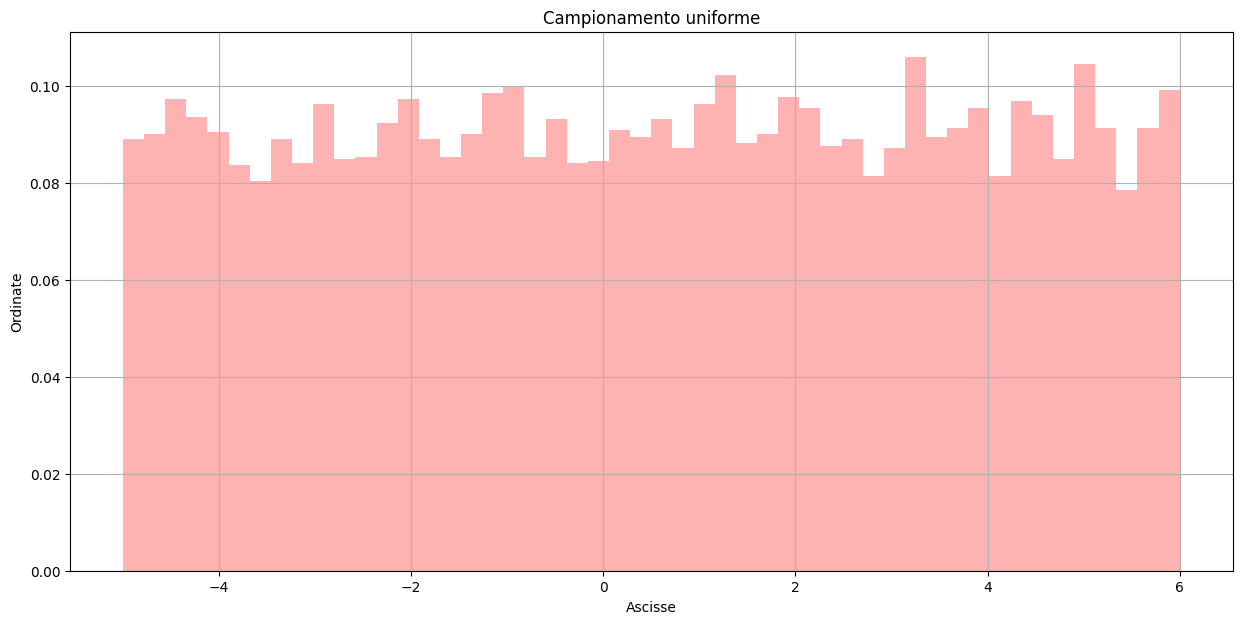

100%|██████████| 2000/2000 [01:03<00:00, 31.73trial/s, best loss: -219.80059236980048]
Miglior valore dell'iperparametro:  4.875960135263522


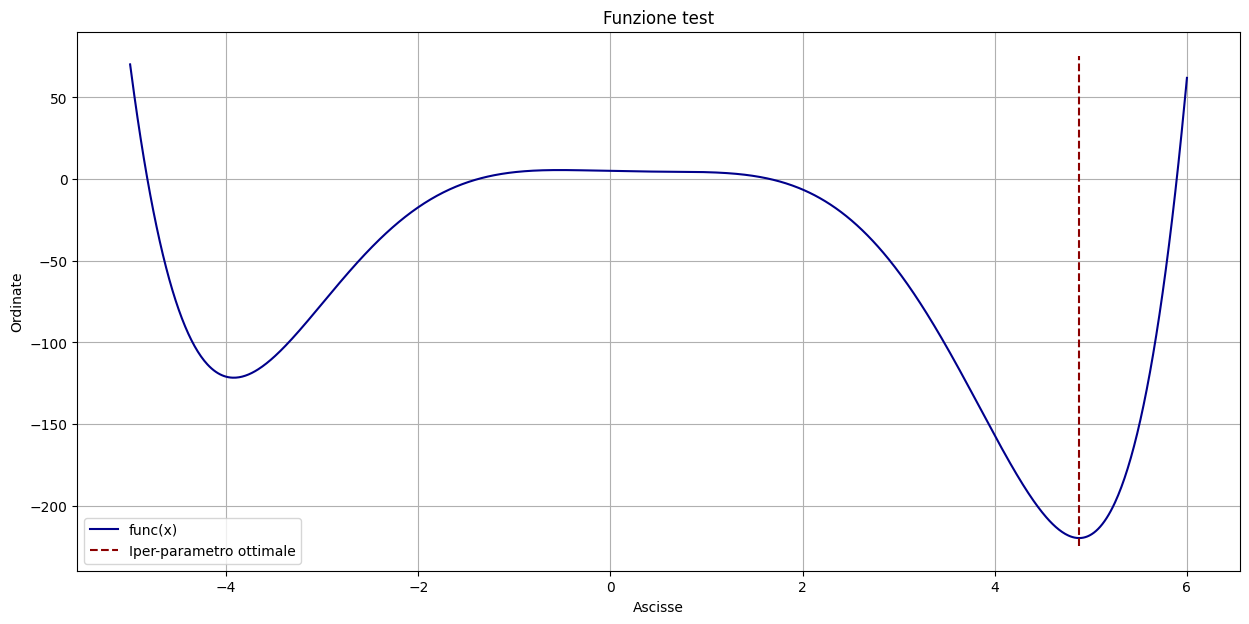

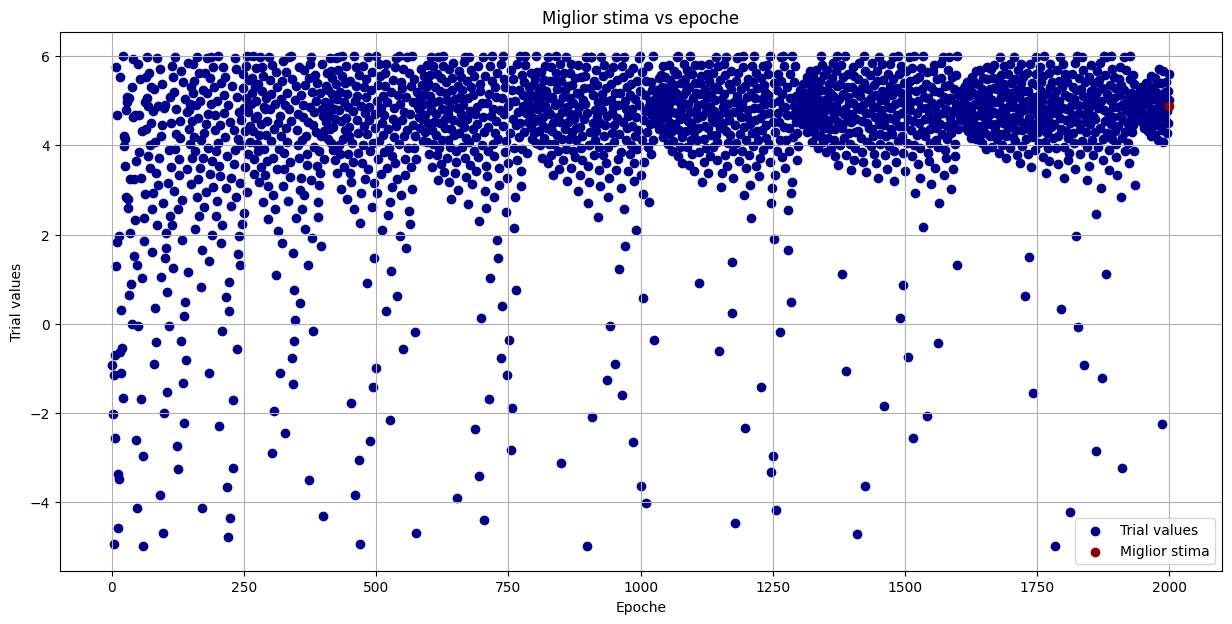

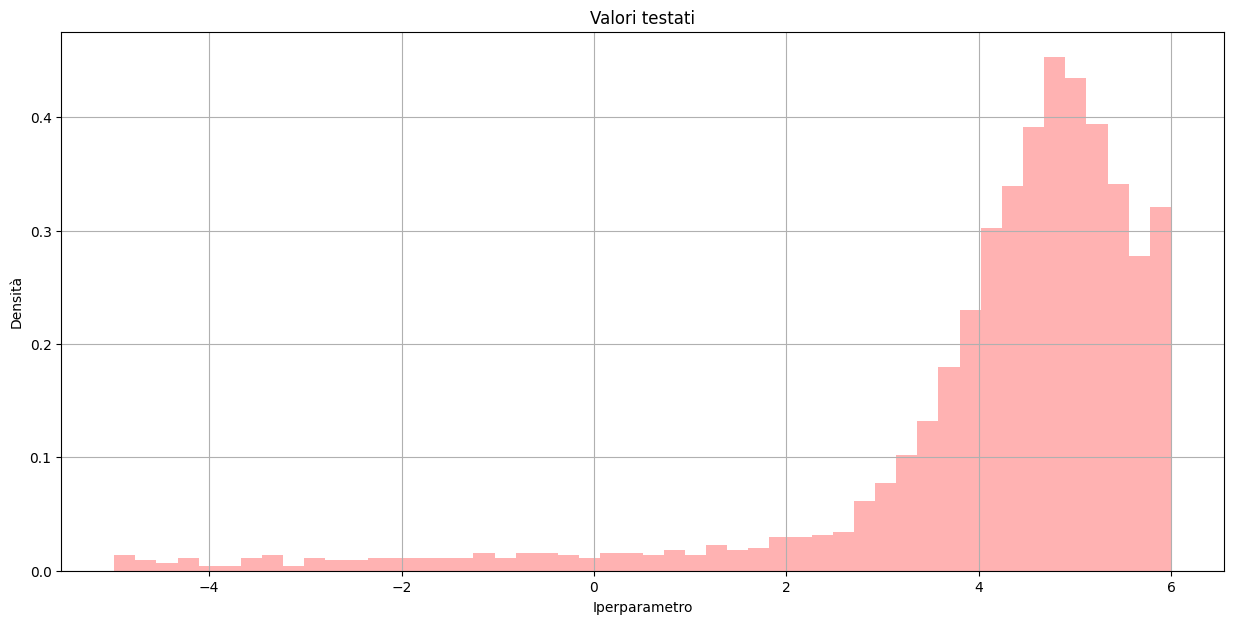

In [24]:
def func(x):
    # Polinomio f(x) = 0.05 * (x^6 - 2x^5 - 28x^4 + 28x^3 + 12x^2 - 26x + 100)
    p = np.poly1d([1, -2, -28, 28, 12, -26, 100])
    return p(x) * 0.05

def plotF(x, minV):
    # Funzione per plottare target

    y = func(x)         # Calcolo funzione
    fig = plt.figure(figsize = (15, 7))
    plt.plot(x, y, color = 'darkblue', label = "func(x)")
    plt.plot(np.array([minV, minV]), np.array([min(y)-5, max(y)+5]), color = 'darkred', linestyle = '--', label = "Iper-parametro ottimale")
    plt.title("Funzione test")
    plt.ylabel("Ordinate")
    plt.xlabel("Ascisse")
    plt.legend(loc = 'best')
    plt.grid(True)
    plt.show()

def plotUnif(x, nbins):
    # Funzione per plottare campionamento uniforme
    fig = plt.figure(figsize = (15, 7))
    plt.hist(x, bins = nbins, range = (min(x), max(x)), density = True, color = (1, 0, 0, 0.3))
    plt.title("Campionamento uniforme")
    plt.ylabel("Ordinate")
    plt.xlabel("Ascisse")
    plt.grid(True)
    plt.show()


def plotHypTr(trials, minV):
    # Funzione per plottare trials vs epoche
    fig = plt.figure(figsize = (15, 7))
    plt.scatter(np.linspace(1, 2000, 2000), np.array(trials.vals['x']), color = 'darkblue', label = 'Trial values')
    plt.scatter(np.array([2000]), np.array(minV['x']), color = 'darkred', label = 'Miglior stima')

    plt.title("Miglior stima vs epoche")
    plt.ylabel("Trial values")
    plt.xlabel("Epoche")

    plt.legend(loc = 'best')
    plt.grid(True)
    plt.show()


def plotSearch(trials, nbins):
    # Funzione per plottare istogramma ricerca minimo
    fig = plt.figure(figsize = (15, 7))
    plt.hist(np.array(trials.vals['x']), bins = nbins, color = (1, 0, 0, 0.3), density=True)

    plt.title("Valori testati")
    plt.xlabel("Iperparametro")
    plt.ylabel("Densità")

    plt.grid(True)
    plt.show()


# Definiamo ora un dominio di ricerca uniforme utilizzando hyperopt
# Facciamo sampling di questo dominio e facciamo un istogramma
space = hp.uniform('x', -5, 6)
plotUnif([sample(space) for _ in range(10000)], 50)


# Procediamo con la minimizzazione della funzione obiettivo, ossia func(x), utilizzando il modello TPE. Le 
# valutazioni della funzione stessa sono 2000. Utilizzo Trials per tenere memoria dell'evoluzione dei vari 
# parametri nelle fasi di allenamento del modello
trials = Trials()
minV = fmin(
    fn=func,                # Funzione obiettivo da ottimizzare
    space=space,            # Spazio dell'iperparametro, in cui sarà cercato il valore ottimale
    algo=tpe.suggest,       # Algoritmo di ottimizzazione
    max_evals=2000,         # Tentativi di ottimizzazione della funzione
    trials = trials         # Memorizzazione fasi ottimizzazione
)
print("Miglior valore dell'iperparametro: ", minV['x'])


# Valuto funzione polinomiale su un intervallo di punti equispaziati fra [-5, 6]
# Evidenzio come la previsione dell'ottimizzazione coincida effettivamente con il minimo della funzione
x = np.linspace(-5, 6, 1000)
plotF(x, minV['x'])


# Stampo ora scatterplot e istogramma per analisi più dettagliate su metodologia ricerca minimo
plotHypTr(trials, minV)
plotSearch(trials, 50)